# Perspective Projection: Distance Estimation

## The Pinhole Camera Model
In computer vision and robotics typically an idealized model of the camera is used - *the pinhole camera model*. Light from the scene passes through an infinitely small hole and an inverted image is projected onto the opposite site of the box. 
To facilitate the visualisation, it is assumed that the projected image is formed on an imaginary image plane in front of the projection center. Then, the image is not longer upside-down.

<p align="center">
  <img height="300" src="imgs/pinhole.png">
</p>

## Perspective Projection
While we are moving through the world, we only perceive a projection of the 3D world onto our eye's retina or the robot perceives a projection of the 3D world onto its camera sensor. This has the effect that object that are close appear larger on the projected picture plane than objects at greater distance. 

This tutorial will provide further insights into the relationship between distance and perceived object size. Knowing the size of an object in the real world, will allow us to calculate the absolut distance to that object. Which assumptions are made? How is the observed error distributed? The following assignment will guide you through analytical methods of distance estimation via perspective projection.

<p align="center">
  <img height="100" src="imgs/perspective.png">
</p>

# Coding: Getting Started
Before you get started you need to follow the descriptions of the Git-Repository and make sure that all required packages are properly installed. It is recommended to work in a virtual environment. Start your virtual environment **before** you launch this jupyter-notebook. Then you may need to change the kernel: *Kernel &rarr; Change kernel &rarr; venv*

In [18]:
import torch
import cv2
import os 
import glob
import argparse
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [19]:
YOLO_MODEL = './model/yolo_model.pt'
FILE = '../../data/test/img/2023-6-28_17-06-35-343099.png'
PATH = '../../data/train/img'
PATH_CSV = '../../data/train/train.csv'
ROBOTS = ["ollie", "grace", "alan", "hermann", "kaethe"]
CAM_ROBOT = "ollie"
DEVICE = "cpu"
FILE_EXTENSION = "*.png"
ROBOT_HEIGHT_M = 0.09
FOCALLENGTH_PX = 627.590698 
CONFIDENCE = 0.75

In [20]:
# Loading YOLOv5 Model
model_YOLO = torch.hub.load('ultralytics/yolov5', 'custom', path=YOLO_MODEL, verbose=False)
model_YOLO.conf = CONFIDENCE
model_YOLO.to(DEVICE)

YOLOv5 🚀 2023-8-13 Python-3.11.4 torch-2.0.1 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## Part 1.1: Projected Object Size and Distance

The provided code automatically detects little Lego Robots in an image. For detection we use a fine-tuned YOLOv5 network that estimates bounding boxes, that each capture the rough dimensions of the projected object.
Given the height of an object bounding box, the camera's focal length as well as the actual robot's height we compute the absolut distance between "CAM_ROBOT" and all visible robots in the image.

In [21]:
def dist(box, focallength_px, robot_height_m):
    
    ####################################################
    # TODO 1:
    # please fill in the code to compute 
    # the distance from the bounding box height

    distance = 0

    ####################################################
    
    return distance

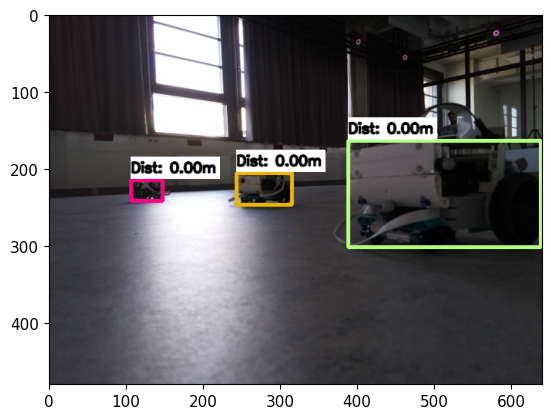

In [22]:
res = model_YOLO(FILE)

bounding_boxes = res.xyxy[0][res.xyxy[0][:, 0].sort()[1]]
image = cv2.imread(FILE)
color = iter(cm.rainbow(np.linspace(0, 1, 5)))

for box in bounding_boxes:

    ####################################################
    # TODO 1:
    # please fill in the code to compute 
    # the distance from the bounding box height

    distance = dist(box, FOCALLENGTH_PX, ROBOT_HEIGHT_M)
    
    ####################################################
    
    c = next(color)
    cv2.rectangle(image, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), c[0:3]*255, 3)
    image_with_rectangle = cv2.rectangle(image, (int(box[0]), int(box[1])-30), (int(box[0]) + 115, int(box[1]-2)), (255,255,255), -1)
    img_drawn = cv2.putText(image, f"Dist: {(distance):.2f}m", (int(box[0]), int(box[1] - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 2, cv2.LINE_AA)
    image_rgb = cv2.cvtColor(img_drawn, cv2.COLOR_BGR2RGB)

# visualize frame with overlayed 
# bounding boxes and distance estimates
%matplotlib inline

fig = plt.figure()
plt.imshow(image_rgb)
plt.show()

## Part 1.2: Visualization

... now let's run this code on several consequtive frames and visualize the relationship between object height and its distance.

In [ ]:
print("Loading Pictures...")

file_pattern = os.path.join(PATH, FILE_EXTENSION)
picture_files = glob.glob(file_pattern)
picture_files.sort()

print("Reading pictures...")

values = {}

for i, file in enumerate(picture_files):

    res = model_YOLO(file)
    bounding_boxes = res.xyxy[0][res.xyxy[0][:, 0].sort()[1]]

    for box in bounding_boxes:
        
        distance = dist(box, FOCALLENGTH_PX, ROBOT_HEIGHT_M)

        values.setdefault(distance, []).append(box[3] - box[1])

In [ ]:
x = []
y = []

for dist in values:
    for height in values[dist]:
        x.append(height.item())
        y.append(dist)

plt.scatter(x, y)

plt.xlabel('Height of the bounding box (in pixel)')
plt.ylabel('Distance (in m)')
plt.title('Plot of height and distance')

plt.show()

## Part 2.1: Evaluation

Groudtruth robot poses were captured with a motion capture system for all robots visible in this data. Poses were saved in the provided .csv file. In this part of the tutorial let's anayse the observed error. How does this relate to the object's distance? What are possible causes of this error?

In [ ]:
# get list of picture files in PATH
file_pattern = os.path.join(PATH, FILE_EXTENSION)
picture_files = glob.glob(file_pattern)
picture_files.sort()

# read csv file with ground truth robot poses
df = pd.read_csv(PATH_CSV, header=None)

# get column for each robot in csv file
row = df.iloc[0].to_numpy()
robot_col = {}
for rbo in ROBOTS:
    bool_array = row == rbo
    robot_col[rbo] = bool_array.argmax()
cam_robot_col = robot_col[CAM_ROBOT]

err = []
distance_x = []

for i, file in enumerate(picture_files):

    # -----------------------------------------------------------------
    # LOAD GROUNDTRUTH DISTANCES FOR EACH PICTURE
    # -----------------------------------------------------------------
    
    row_val = os.path.basename(file)
    row_matching_value = df[df.iloc[:, 0] == row_val]
    print("********")
    print(row_val)

    if row_matching_value.empty:
        print("Skipping, since no matching image name in csv")
        continue

    row = row_matching_value.index[0]

    if type(df.at[row,2]) is not str and math.isnan(df.at[row,2]):
        print("Skipping, since no robots visable on image ")
        continue
       
    # robots present in current frame
    robot_list = df.at[row,2].split()
    
    distance_gt = []
    
    for robot in zip(robot_list):
        
        # pose of the camera robot
        camX = df.at[row,cam_robot_col+2]
        camY = df.at[row,cam_robot_col]

        # pose of neighboring robot
        robotX = df.at[row, robot_col[robot[0]] + 2]
        robotY = df.at[row, robot_col[robot[0]]]

        # GROUNDTRUTH DISTANCE
        distance = np.sqrt((float(robotX)-float(camX)) ** 2 + (float(robotY)-float(camY)) ** 2)
        distance = distance / 100
        
        print(f"distance_gt: {distance}")
        
        distance = torch.tensor(distance, dtype = torch.float32,)
        distance_gt.append(distance)
        
    # -----------------------------------------------------------------
    # COMPUTE DISTANCE FROM BOUNDING BOX HEIGHT
    # -----------------------------------------------------------------
    
    res = model_YOLO(file)
    bounding_boxes = res.xyxy[0][res.xyxy[0][:, 0].sort()[1]]

    distance_estim = []
    
    for box in bounding_boxes:
        
        distance = dist(box, FOCALLENGTH_PX, ROBOT_HEIGHT_M)
        distance_estim.append(distance)
        
        print(f"distance_estim: {distance}")
        
    # -----------------------------------------------------------------
    # COMPUTE ERROR
    # -----------------------------------------------------------------
    
    if(bounding_boxes.shape[0] == len(robot_list)):

        error = abs(np.array(distance_gt) - np.array(distance_estim))
        err.extend(error)
        distance_x.extend(distance_gt)

## Part 2.2: Visualization
...now let's visualize again.

In [ ]:
print(distance.shape)
print(error.shape)

plt.scatter(distance_x, err, label='Error')
mean_err = np.mean(err)
plt.axhline(y=mean_err, color='r', linestyle='--', label=f'Mean Error: {mean_err:.2f} m')

# Adding labels and title
plt.xlabel('Distance [m]')
plt.ylabel('Error [m]')

# Display the plot
plt.legend()
plt.show(block=True)

## Question 1:
Please describe the behavior of the error. What are possible causes for errors that you observe? (Please name at least three causes)

*Answer:*